# Simulador de daltonismo

Bruna Kimura e Elisa Malzoni


###### Introdução


Este primeiro projeto consiste em simular em imagens como um daltônico (protanopia e deuteranopia) as veriam. Para tanto foi utilizado como base o artigo _Digital Video Colourmaps for Checkinh the Legibility of Displays by Dichromats_ de Viénot, Brettel e Mollon.

In [100]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

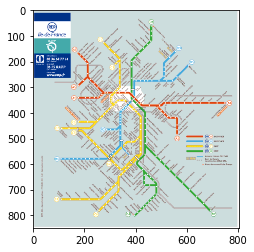

In [101]:
img = cv2.imread('normal.png')

# invertendo as componentes de cor BGR para RGB
img = img[:, :, ::-1]
plt.imshow(img)

## Simulador de protanopia e deuteranopia

### Passo 1:


In [102]:
new_img = (img / 255.0) ** 2.2

### Passo 2:
Tendo os valores em RGB, o primeiro passo é ajustar o fluxo RGB

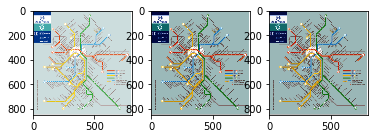

In [103]:
pro_img = (new_img * 0.992052) + 0.003974
deu_img = (new_img * 0.957237) + 0.0213814

# pro_img = new_img.copy()
# deu_img = new_img.copy()

# pro_img[:,:,0] = (0.992052 * img[:,:,0]) + 0.003974
# pro_img[:,:,1] = (0.992052 * img[:,:,1]) + 0.003974
# pro_img[:,:,2] = (0.992052 * img[:,:,2]) + 0.003974

# deu_img[:,:,0] = (0.957237 * img[:,:,0]) + 0.0213814
# deu_img[:,:,1] = (0.957237 * img[:,:,1]) + 0.0213814
# deu_img[:,:,2] = (0.957237 * img[:,:,2]) + 0.0213814

f, axarr = plt.subplots(1,3)

axarr[0].imshow(img)
axarr[1].imshow(pro_img)
axarr[2].imshow(deu_img)


As imagens acima representam a imagem normal, imagem com ajuste de fluxo para protanopia e deuteranopia respectivamente.

### Passo 3:
Transformar o RGB em sinais LMS

Teste professor

In [48]:
pro_img.shape

(849, 803, 3)

In [49]:
img_teste = np.arange(24).reshape((3, 4, 2))
img_teste[:,:,0]

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [50]:
img_teste[:,:,1]

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

In [51]:
img_teste

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [52]:
np.rollaxis(img_teste, 0, 2)

array([[[ 0,  1],
        [ 8,  9],
        [16, 17]],

       [[ 2,  3],
        [10, 11],
        [18, 19]],

       [[ 4,  5],
        [12, 13],
        [20, 21]],

       [[ 6,  7],
        [14, 15],
        [22, 23]]])

In [53]:
img_teste_reshape = np.matmul([[10, 0], [0, 1]], np.reshape(np.swapaxes(img_teste, 0, 2), (2, 12)))
np.swapaxes(np.reshape(img_teste_reshape, (2, 4, 3)), 0, 2)

array([[[  0,   1],
        [ 20,   3],
        [ 40,   5],
        [ 60,   7]],

       [[ 80,   9],
        [100,  11],
        [120,  13],
        [140,  15]],

       [[160,  17],
        [180,  19],
        [200,  21],
        [220,  23]]])

### 3.1 RGB to LMS

In [104]:
RGB_to_LMS = np.array([[17.8824, 43.5161, 4.11935],
                       [3.45565, 27.1554, 3.86714],
                       [0.0299566, 0.184309, 1.46709]])

In [105]:
pro_array = np.array([pro_img[:,:,0].ravel(), pro_img[:,:,1].ravel(), pro_img[:,:,2].ravel()])
deu_array = np.array([deu_img[:,:,0].ravel(), deu_img[:,:,1].ravel(), deu_img[:,:,2].ravel()])

In [106]:
deu_array.shape

(3, 681747)

In [107]:
LMS_pro = np.matmul(RGB_to_LMS, pro_array)
LMS_deu = np.matmul(RGB_to_LMS, deu_array)

### 3.2 Outra forma

In [58]:
#tranformando RGB em XYZ usando função python
pro_XYZ = cv2.cvtColor(pro_img, cv2.COLOR_RGB2XYZ)
pro_XYZ.shape

error: /io/opencv/modules/imgproc/src/color.cpp:11073: error: (-215) depth == 0 || depth == 2 || depth == 5 in function cvtColor


In [59]:
print(pro_XYZ[0,0,:])

NameError: name 'pro_XYZ' is not defined

In [60]:
XYZ_to_LMS = np.array([[0.15514, 0.54312, -0.03286],
                       [-0.15514, 0.45684, 0.03286],
                       [0, 0, 0.01608]])

### Passo 4:


In [77]:
matrix_pro = np.array([[0, 2.02344, -2.52581],
                       [0, 1, 0],
                       [0, 0, 1]])

matrix_deu = np.array([[1, 0, 0],
                       [0.04494207, 0, 1.24827],
                       [0, 0, 1]])

In [78]:
LMS_pro_trans = np.matmul(matrix_pro, LMS_pro)
LMS_deu_trans = np.matmul(matrix_deu, LMS_deu)
LMS_pro_trans

array([[ 65.25739639,  65.25739639,  65.25739639, ...,  65.25739639,
         65.25739639,  65.25739639],
       [ 34.34117367,  34.34117367,  34.34117367, ...,  34.34117367,
         34.34117367,  34.34117367],
       [  1.67467389,   1.67467389,   1.67467389, ...,   1.67467389,
          1.67467389,   1.67467389]])

## Passo 5

In [63]:
inv_RGB_to_LMS = ([[0.080944, -0.130504, 0.116721],
                   [-0.0102485, 0.0540194, -0.113615],
                   [-0.000365294, -0.00412163, 0.69353]])

In [80]:
RGB_pro = np.matmul(inv_RGB_to_LMS, LMS_pro_trans)
RGB_deu = np.matmul(inv_RGB_to_LMS, LMS_deu_trans)
RGB_pro

array([[ 0.99600378,  0.99600378,  0.99600378, ...,  0.99600378,
         0.99600378,  0.99600378],
       [ 0.9960311 ,  0.9960311 ,  0.9960311 , ...,  0.9960311 ,
         0.9960311 ,  0.9960311 ],
       [ 0.99605684,  0.99605684,  0.99605684, ...,  0.99605684,
         0.99605684,  0.99605684]])

In [81]:
rows, cols, colors = img.shape

In [82]:
R_pro = np.reshape(RGB_pro[0,:], (rows, cols))
G_pro = np.reshape(RGB_pro[1,:], (rows, cols))
B_pro = np.reshape(RGB_pro[2,:], (rows, cols))

R_deu = np.reshape(RGB_deu[0,:], (rows, cols))
G_deu = np.reshape(RGB_deu[1,:], (rows, cols))
B_deu = np.reshape(RGB_deu[2,:], (rows, cols))

In [95]:
pro = np.dstack((R_pro, G_pro, B_pro))

In [96]:
deu = np.dstack((R_deu, G_deu, B_deu))

In [97]:
pro.shape
deu.shape

(849, 803, 3)

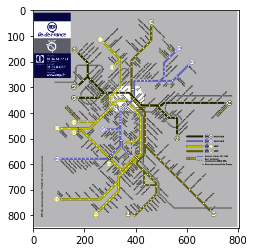

In [98]:
plt.imshow(pro)

In [99]:
plt.imshow(deu)

ValueError: Floating point image RGB values must be in the 0..1 range.

## Passo 6

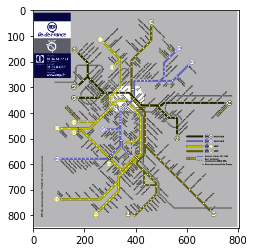

In [70]:
final_pro = (255 * pro)**(1/2.2)
final_deu
plt.imshow(pro)

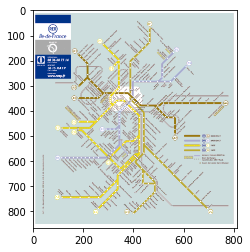

In [91]:
plt.imshow(cv2.imread('protan.png')[:, :, ::-1])


## Validação


## Aplicações